# **Supervise Learning Classification Project - Personal Loan Campaigns**

**Context**

AllLife is a growing bank having majority liability customers (depositors) and less borrowers (asset customers). Bank wants to bring in more loan business and earn interest on loans. Bank wants to target their liability customers to make them personal loans customers while retaining them as depositors.


**Objective**

Create classification models using Logistic Regression and Decision Tree to find below answers so it can help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

* Predict whether a liability customer will buy a personal loan or not.

* Find most significant variables.

* Find segments of customers should be targeted more.

**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# **1. Loading Required Libraries and Importing Data**

In [1]:
# Importing libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Importing Libraries to help with EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Create DataFrame 'loan' by importing 'Loan_Modelling' file and make a copy of it just in case if need to revert back
loan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv')
loan_copy = loan.copy()

# **2. Exploring Data At High Level**

Check first 10 records to see the dataset at high level

In [4]:
loan.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


By looking at sample records, at a first glace data looks clean and as per the data dictionary. 

In [5]:
# checking for dups
loan.duplicated().sum()

0

There are no duplicates

In [6]:
# checking rows and columns of dataframe
loan.shape

(5000, 14)

There are 5000 rows and 14 columns

In [7]:
# check datatypes and non null counts
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Looks like there are no missing values in any of the columns as all the columns have 5000 non-null records and total rows are 5000 as well. 

Also, all the columns are numeric, no categorical columns present

In [8]:
# check some stats of columns
loan.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Few observations - 

1) All the customers are between age 23 and 67 with average age as 45

2) Average and maximum people have experience of 20 years. However, the minimum experience is -3 years. Need to check all the records with negative values. 

3) Family size is between 1 and 4

4) Income varies between 8k and 224k. The 75th percentile has value of 98k, so there could be some outliers. 

One more thing to do before movining forward. 

'ID' column is a Customer ID and can be dropped as it would not add any value in Modelling and would not be required for EDA as well. So it is better to drop at this point. 

In [9]:
# dropping ID column in original dataset
loan.drop(columns='ID', inplace=True)

In [10]:
# checking one more time
loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# **3. Exploratory Data Analysis (EDA)**

### Univariate Analysis

Let's create function to find counts/percentage of columns with handful of unique values to understand the data better.

In [11]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

**Income**

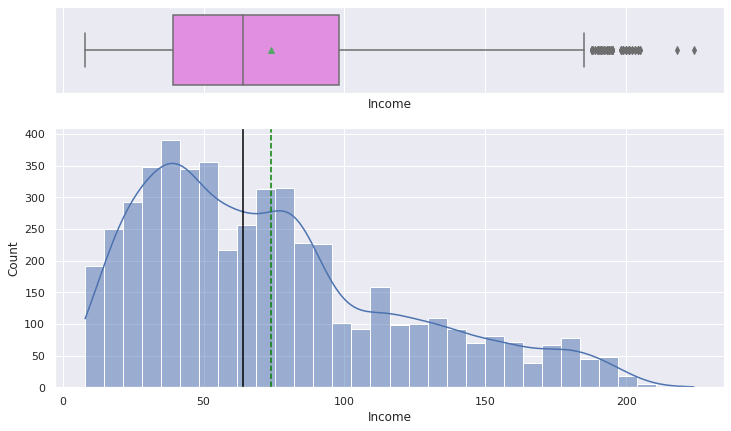

In [12]:
histogram_boxplot(loan,'Income',kde=True)

Income is right skewed with some outliers

**CCAvg**

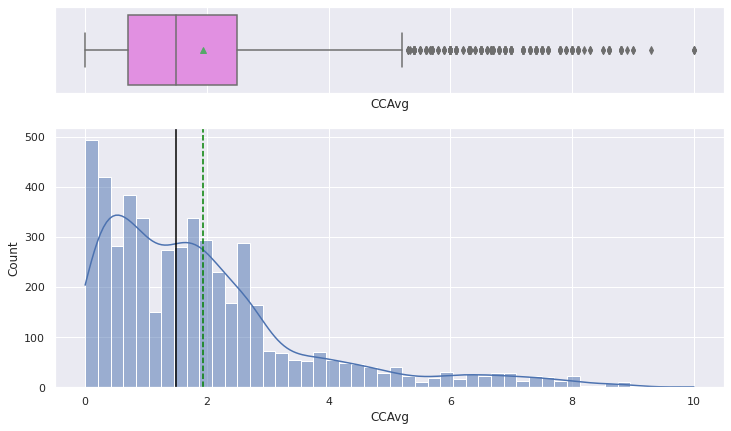

In [13]:
histogram_boxplot(loan,'CCAvg',kde=True)

CCAvg is right skewed with many outliers after right whisker.

**Mortgage**

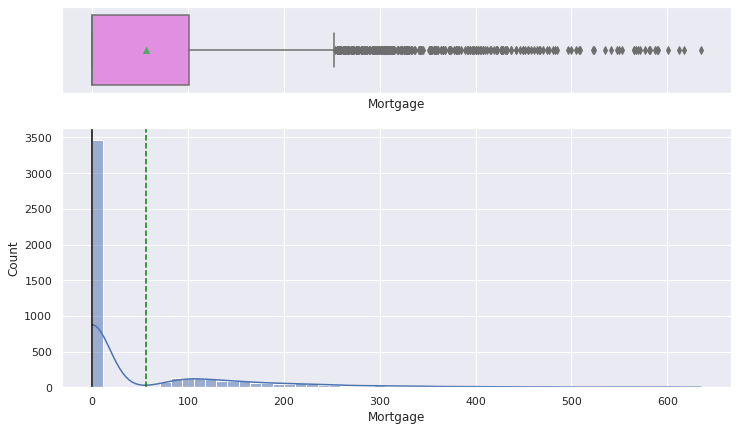

In [14]:
histogram_boxplot(loan,'Mortgage',kde=True)

As per diagram, there are many outliers but people without mortgage has 0 values, so it makes sense to have that.

**Age**

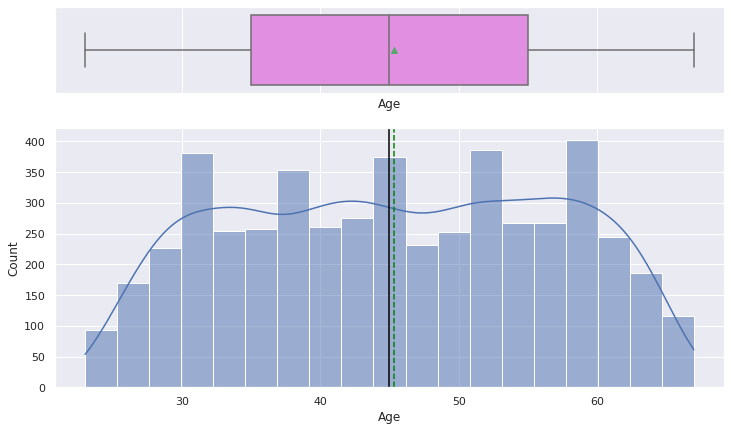

In [15]:
histogram_boxplot(loan,'Age',kde=True)

Customers are divived in various age group. There are no outliers. 

**Family**

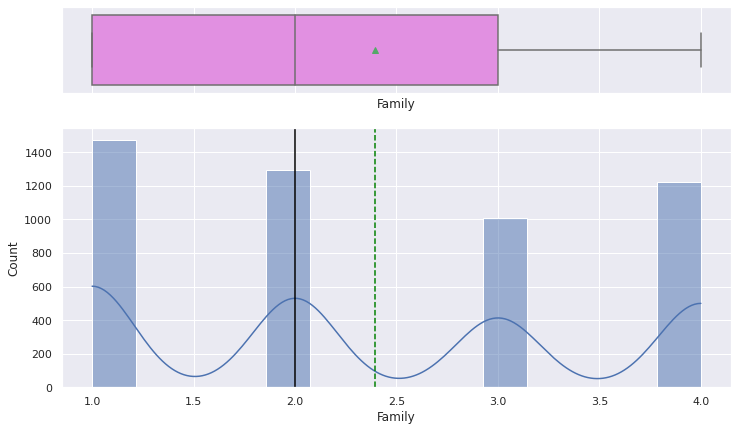

In [16]:
histogram_boxplot(loan,'Family',kde=True)

Most of the customers have single member in family. 

**Education**

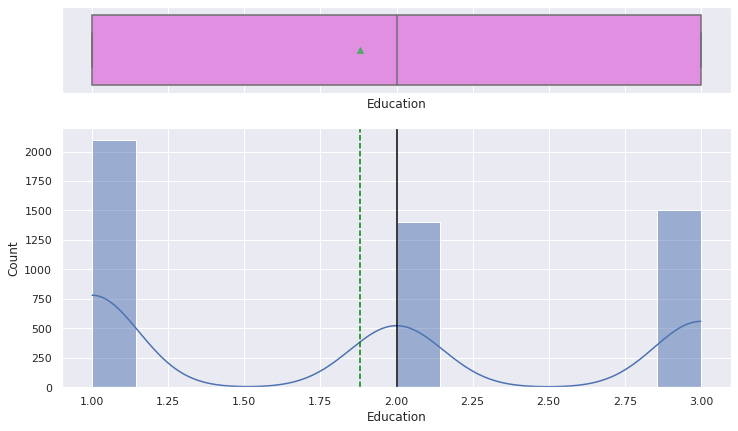

In [17]:
histogram_boxplot(loan,'Education',kde=True)

Most of the people have 'Undergraduate' level education. 'Advanced' level customers are slightly more than 'Graduate' ones.

**Experience**

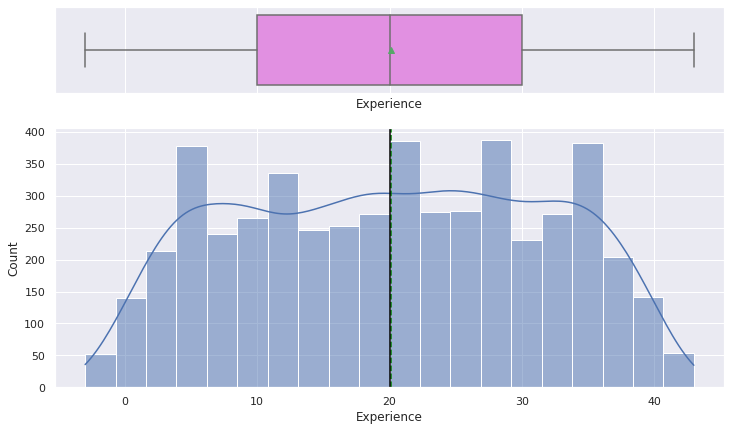

In [18]:
histogram_boxplot(loan,'Experience',kde=True)

Apart from few negative values, rest experience values look good.

Let's create function to find counts/percentage of columns which supposed to have either 0 or 1 values to understand the data better and find out if any bad data is there.

In [19]:
# function to create labeled countplots

def labeled_countplot(data, feature, hue=None, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    if hue==None:
      ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )
    else: 
      ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
      )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Security Account**

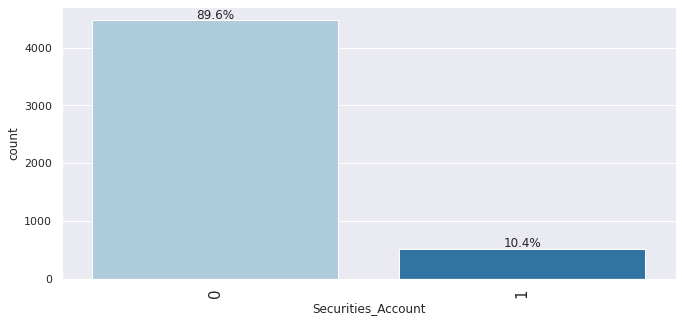

In [20]:
labeled_countplot(loan,'Securities_Account',perc=True, n=10)

No bad data. Majority of customers do not have Security Account.

**CD Account**

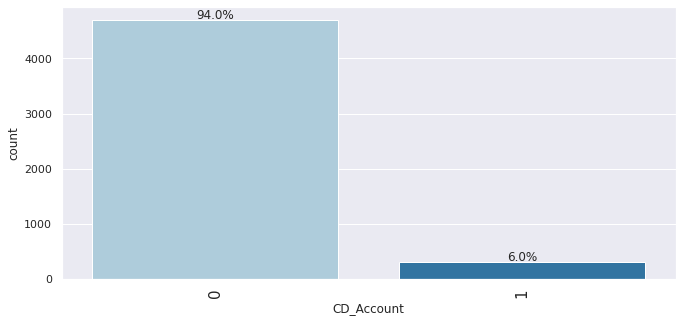

In [21]:
labeled_countplot(loan,'CD_Account', perc=True,n=10)

No bad data. More than 90% customers do not have CD Account.

**Online**

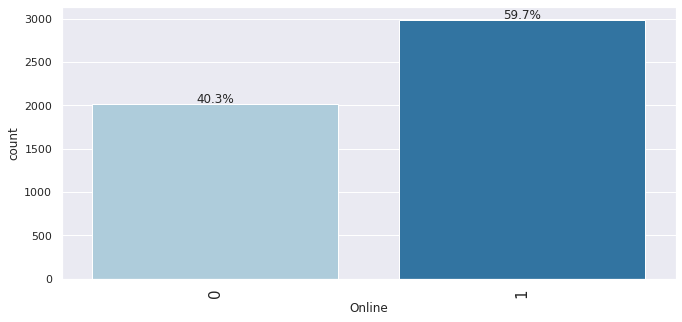

In [22]:
labeled_countplot(loan,'Online', perc=True,n=10)

No bad data. Customers are close to equally divided in using Online banking. 

**Credit Card**

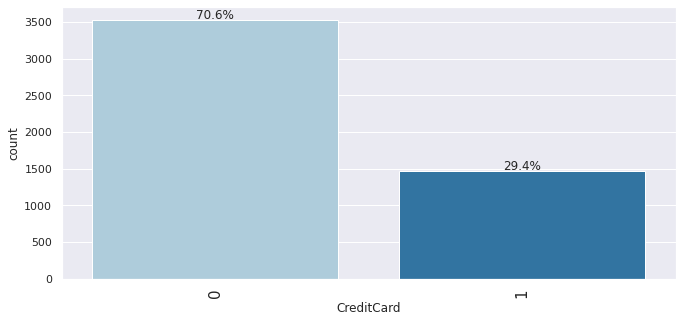

In [23]:
labeled_countplot(loan,'CreditCard', perc=True, n=10)

No bad data. Almost 2/3rd cusotmers do not have Credit card.

### Bivariate Analysis

Let's start by finding the correlations between different columns to get generic idea.

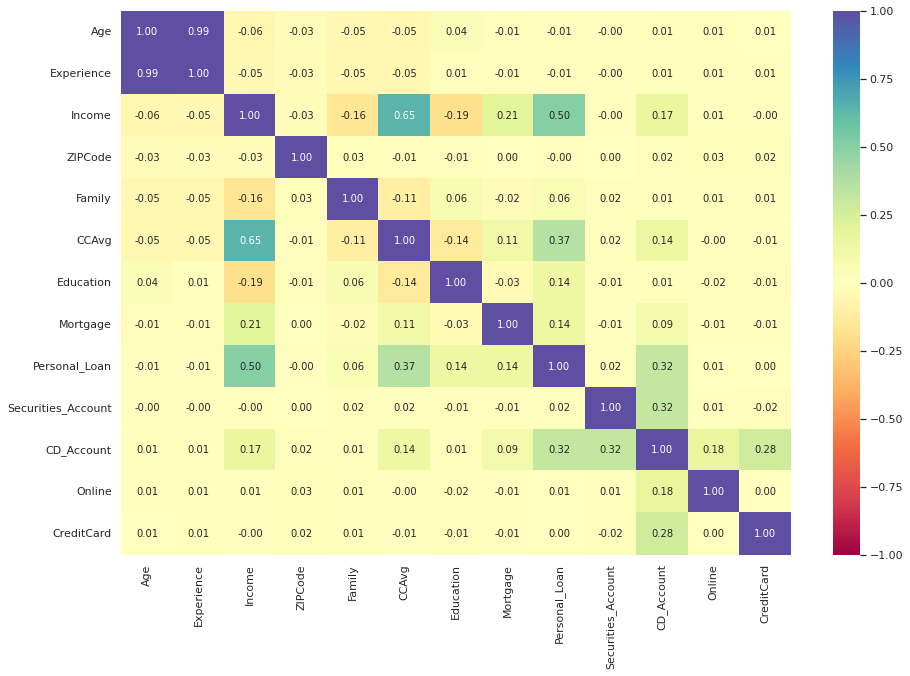

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Few observations - 

1) Age and Experience are highly correlated and it makes sense also. Also it means most of the people are working otherwise experience will not grow with age. 

2) Average credit card spending is positively correlated with income. Higher the income, higher the spending. 

3) Income is positively correlated with Mortgage amount but slightly negatively correlated with number of years of education.

4) Number of family members and Zipcode do not have much correlation with any columns

Columns like Securities_Account,	CD_Account,	Online and	CreditCard have boolean values. Let's see the effect of their statuse on Personal Loan via stacked plots. We'll first create the function to do that.

In [25]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Security Account vs. Personal Loan**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


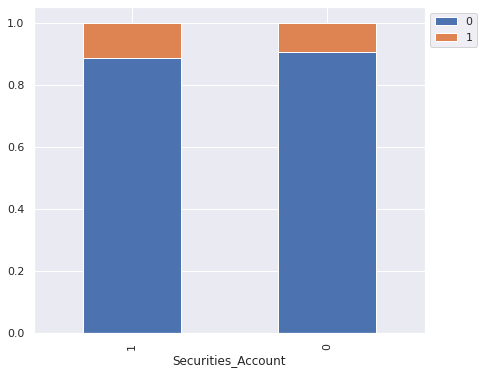

In [26]:
stacked_barplot(loan,'Securities_Account','Personal_Loan')

Having Security account or not having security account do not really affect the customer taking personal loan 

**CD Account vs. Personal Loan**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


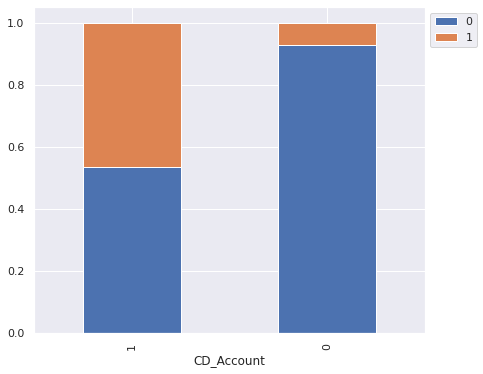

In [27]:
stacked_barplot(loan,'CD_Account','Personal_Loan')

Almost 50% customers with CD Account likely to get Personal Loan

**Online vs. Personal Loan**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


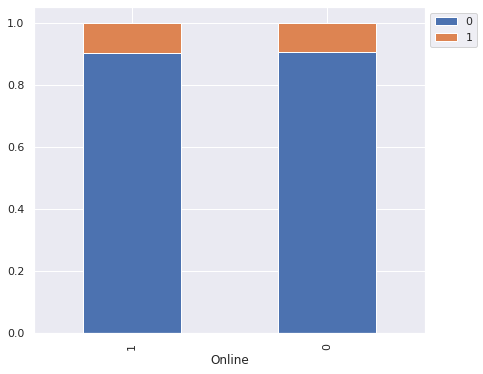

In [28]:
stacked_barplot(loan,'Online','Personal_Loan')

Online usage doesn't really affect the Personal Loan

**Credit Card vs. Personal Loan**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


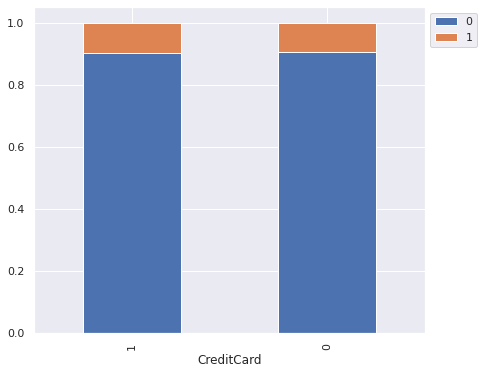

In [29]:
stacked_barplot(loan,'CreditCard','Personal_Loan')

In both cases, customer having credit card or not having credit card, the Personal Loan ratio is small. 

**Family vs. Personal Loan**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


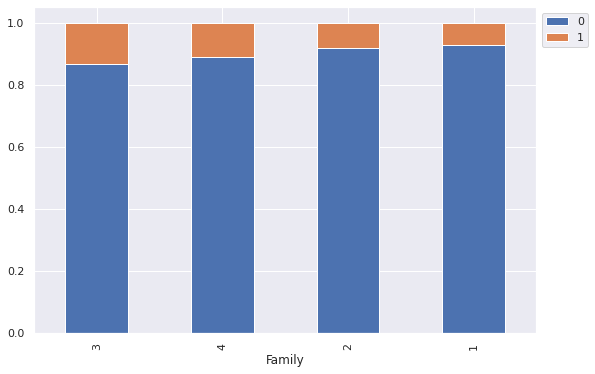

In [30]:
stacked_barplot(loan,'Family','Personal_Loan')

Family of 3 and 4 having bit higher chance of having Perosnal Loan.

**Education vs. Personal Loan**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


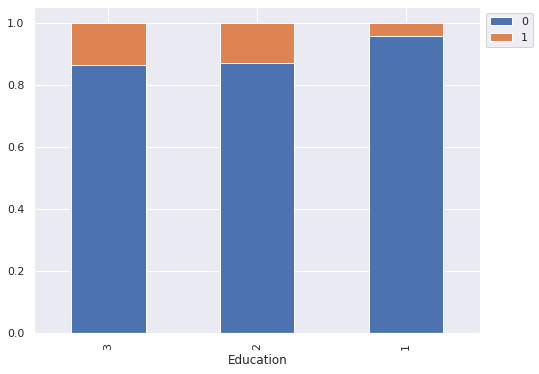

In [31]:
stacked_barplot(loan,'Education','Personal_Loan')

Personal Loan ratio increases with number of years of Education. Advanced level of professionals tend to take more loans, very close to graduate level people.

**Experience vs. Personal Loan**

Experience has lot of distinct values. I would like to use the labled_countplot function to do the analysis.

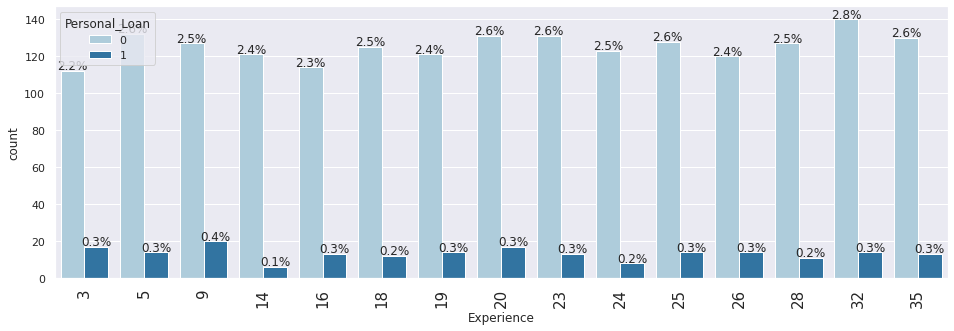

In [32]:
labeled_countplot(loan,'Experience',hue='Personal_Loan', perc=True, n=15)

Number of years of experience doesn't really affect the rate of Personal Loan

**Age vs. Personal Loan**

Age has lot of distinct values. I would like to use the labled_countplot function to do the analysis.

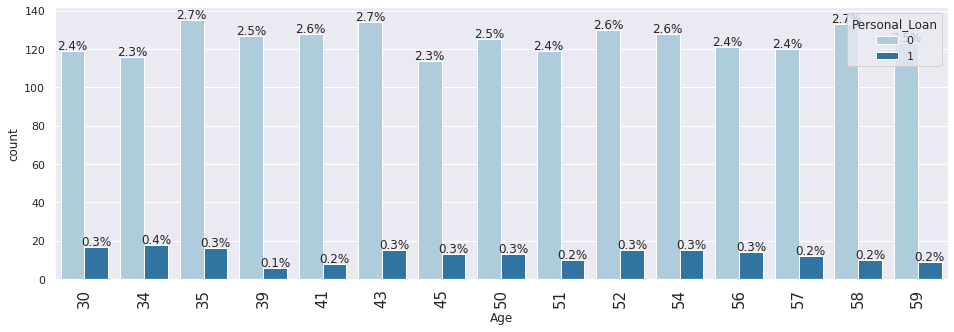

In [33]:
labeled_countplot(loan,'Age',hue='Personal_Loan', perc=True, n=15)

Age doesn't really affect the rate of Personal Loan

Next, analyze the columns with amounts like Income, Mortgage, CCAvg with respect to Personal Loan

**Income vs. Personal Loan**

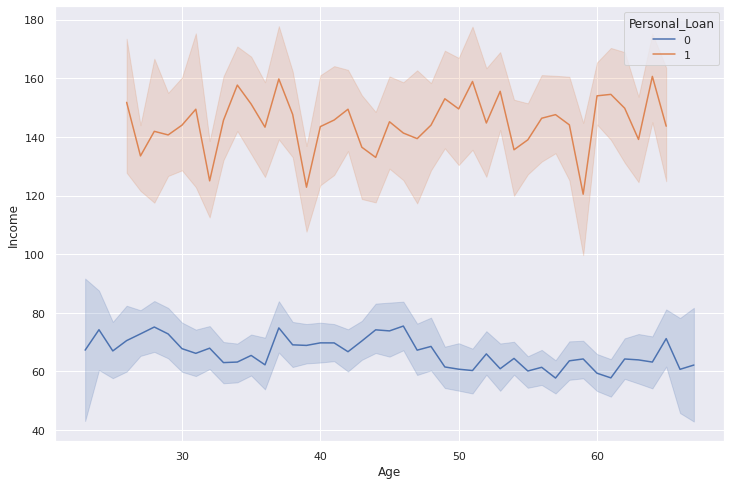

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=loan,x='Age',y='Income',hue='Personal_Loan')
plt.show()

It clearly shows the higher income people tend take Personal Loan compare to lower income people

**CCAvg vs. Personal Loan**

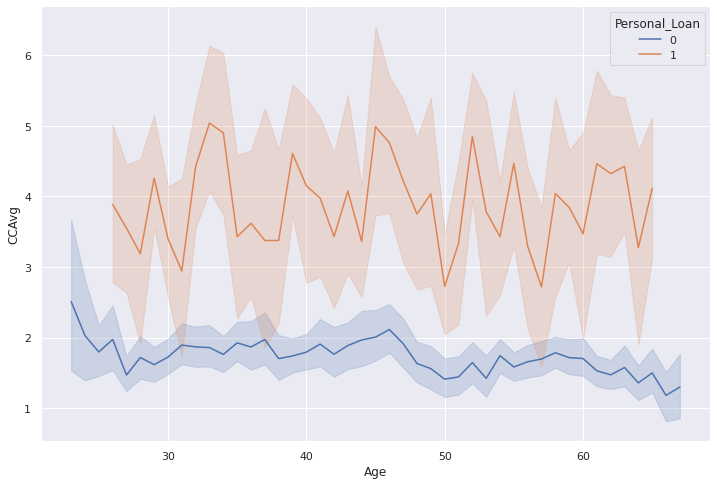

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=loan,x='Age',y='CCAvg',hue='Personal_Loan')
plt.show()

People who spends more on credit card likely to take more Personal Loan

**Mortgage vs. Personal Loan**

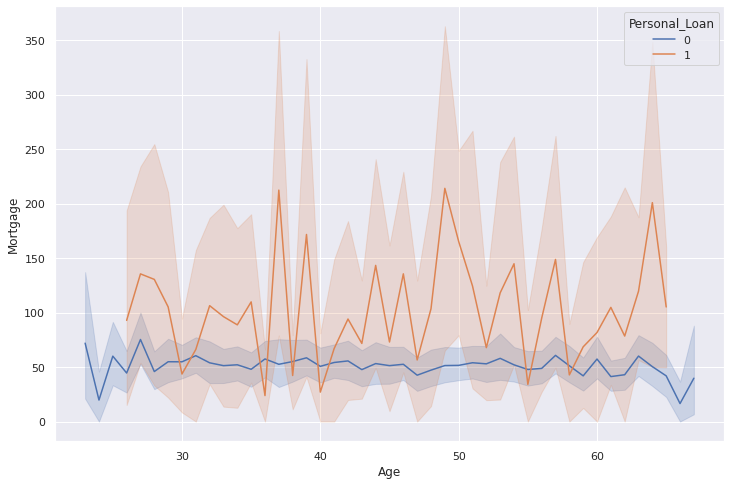

In [36]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=loan,x='Age',y='Mortgage',hue='Personal_Loan')
plt.show()

It's hard to say if Mortgage has much effect on Personal Loan or not. Let's do scatterplot to check out

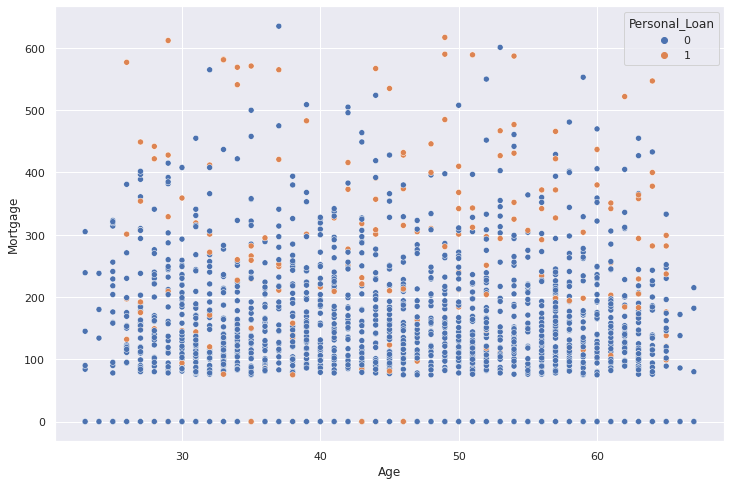

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = loan, x='Age', y='Mortgage', hue='Personal_Loan')
plt.show()

As observed earlier, it doesn't have much effect. People with higher mortgage tend to take Personal loan but not always and also people with 0 mortgage take Personal Loan as well.

### Summary of Observations of EDA

Age - customers are divided across different age groups. Most of them between 30 and 60. There are no outliers and Age doesn't really affect the customer taking Personal Loan. 

Income - it's rightly skewed and higher income people take Personal Loan more than lower income people. 

CD_Account - Around 94% customers do not have CD_Account. However, around 50% people who has CD_Account takes Personal Loan.

Online - customers using internet vs not using are divided at 60/40 ratio. Doesn't really affect the customer taking Personal Loan. 

Credit Card - Around 70% customers do not have credit card. Doesn't affect the customer taking Personal Loan. 

Education - all data divided between 3 groups without any outliers. Customers with higher education tend to take more Personal Loan compare to lower education levels. 

Security Account - Almost 90% customers do not have security account and it doesn't affect customer taking Personal Loan.

Experiecne - number of years of experience doesn't affect customer taking Personal Loan. There are some negative values, which can't be right and need to be treated later.  

Mortgage - it's highly skewed on right with lot of outliers. It is because customers without Mortgage has 0 value. Customers with higher mortgage tend to take Personal loan more but not always and also people with 0 mortgage take Personal Loan as well.

CC_Avg - its positively skewed as well and people with higher cc_avg tend to get Personal Loan. It is positively correlated with income as well.

Family - customers with family of 3 or more take Personal Loan compare to family with less than 3. 

None of the columns having bad data that has to be treated except some records of negative 'Experience'. Outliers would be checked later to see if its valid or not. 



# **4. Data Pre-Processing**

### Missing Values

As observed in 'Exploring Data At High Level' section, there were no nulls in data. Let's check one more time to be sure.

In [38]:
loan.isnull().values.any() # If there are any null values in data set

False

No null values as expected.

### Outlier Detection and Treatment

Let's check outliers found in EDA section - CCAvg, Mortgage and Income

**CCAvg**

Check all the customers with CCAvg of more than 8K per month. 

In [39]:
loan.loc[loan['CCAvg']>8]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
462,29,4,183,91423,3,8.3,3,0,1,0,0,1,0
614,37,12,180,90034,1,8.6,1,0,0,0,0,1,1
740,52,27,195,90266,1,8.1,1,0,0,0,0,0,0
787,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
807,52,27,162,92096,1,8.1,1,0,0,0,0,1,0
881,44,19,154,92116,2,8.8,1,0,0,0,0,1,0
915,53,28,184,94550,1,8.1,1,303,0,0,0,1,0
917,45,20,200,90405,2,8.8,1,0,0,0,0,1,1


Most of the customers with higher CCAvg has higher Income as well. I do not think outlier treatment is required.

**Mortgage**

Checking records with Mortgage above 300K

In [40]:
loan.loc[loan['Mortgage']>300]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
42,32,7,132,90019,4,1.10,2,412,1,0,0,1,0
59,31,5,188,91320,2,4.50,1,455,0,0,0,0,0
66,62,36,105,95670,2,2.80,1,336,0,0,0,0,0
112,40,15,82,91775,3,1.00,1,309,0,0,0,0,0
119,32,7,112,94304,1,4.60,1,366,0,0,0,0,0
187,46,21,159,94305,3,1.90,3,315,1,0,0,1,0
251,54,28,170,92182,2,6.20,2,325,1,0,0,1,0
288,44,19,172,94306,2,4.30,3,391,1,1,1,1,0
303,49,25,195,95605,4,3.00,1,617,1,0,0,0,0
327,58,32,114,91330,2,2.00,1,402,0,0,0,1,0


Higher mortgage values do not look abnormal. I do not think outlier treatment is required.

**Income**

Checking Income more than 200K

In [41]:
loan.loc[loan['Income']>200]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
677,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0
1711,27,3,201,95819,1,6.33,1,158,0,0,0,1,0
1901,43,19,201,94305,2,6.67,1,0,0,1,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
2337,43,16,201,95054,1,10.00,2,0,1,0,0,0,1
2447,44,19,201,95819,2,8.80,1,0,0,0,0,1,1
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0


All of above records look reasonable. I do not think outlier treatment is required.

### Feature Engineering

**Experience**

It was observed earlier that 'Experience' column has some negative values, which can't be right. Let's check that out such data and see how can we treat it. Either replace it with 0 or stats columns like mean/median.

In [42]:
# checking records with negative experience
loan.loc[loan['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


When Experience is negative, rest of the columns seem to have proper data. I would not replace experience with 0 in that case. We can replace negative values with stats column.

In most of the cases, Experience depends upon the Age and Education. I would like to take mean of Experience by Age and Education for non 0 records of Loan dataframe and replace negative experience with that.

Let's store negative experience data into another dataframe

In [43]:
# create new dataframe name neg_exp
neg_exp = loan.loc[loan['Experience']<0]

Let's convert all negative values of Experience to 0 in Loan and neg_exp dataframe both.

In [ ]:
neg_exp['Experience'] = [i if i > 0 else 0 for i in neg_exp.Experience]

It should covert for all the records. 

In [45]:
loan['Experience'] = [i if i > 0 else 0 for i in loan.Experience]

It should convert for all negative experience records.

Take mean of Experience by Age and Education for non 0 records of Loan dataframe and replace that in neg_exp dataframe. 

In [ ]:
neg_exp['Experience'] = loan.groupby(["Age","Education"])["Experience"].transform('mean')

In [47]:
# checking sample records for neg_exp
neg_exp.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,0.052632,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,0.000000,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,0.000000,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,2.500000,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,0.000000,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,0.090909,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,0.052632,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,0.052632,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,0.000000,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,0.000000,125,92835,2,7.20,1,0,0,1,0,0,1


Let's replace these values in original loan dataframe. It would replace these values. However, it would convert the other original values of Experience with NaN. We can use our copy dataframe (loan_copy) to replace NaN values. 

In [48]:
loan.loc[:, ['Experience']] = neg_exp[['Experience']]

In [49]:
loan['Experience'] = loan['Experience'].fillna(loan_copy['Experience'])

Let's check loan dataframe one more time for negative experience values and null values. 

In [50]:
loan.loc[loan['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [51]:
loan.Experience.isnull().value_counts()

False    5000
Name: Experience, dtype: int64

As expected all values of 'Experience' are treated. 

**CCAvg**

Column 'CCAvg' is the average spending on credit cards per month (in thousand dollars). However, the 'Income' in by year in thousand dollars. Let's convert 'CCAvg' from month to Yearly spending. 

In [52]:
loan['CCAvg_Per_Year'] = loan['CCAvg'] * 12

In [53]:
loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,CCAvg_Per_Year
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,19.2
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,18.0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,12.0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,32.4
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,12.0


Looks good, we can drop CCAvg column now

In [54]:
# dropping CCAvg
loan.drop(columns='CCAvg',axis=1,inplace=True)

**ZIPCode**

As observed earlier, zip code doesn't really contribute to personal loans. Let's drop it. 

In [55]:
# dropping ZIPCode
loan.drop(columns='ZIPCode',axis=1,inplace=True)

Final check on data

In [56]:
loan.head()

,Age,Experience,Income,Family,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,CCAvg_Per_Year
0,25,1.0,49,4,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,12.0


All look good. Let's do modelling

# **5. Model building - Comman Pre Tasks**

In this section, we will perform tasks that would be used by both Logistics and Decision Tree modeling.

**Model evaluation criterion**

Model can make wrong predictions in 2 cases - 

1) when model predicts that the liability customer would buy loan but he would not buy when offered.

2) when model thinks liability customer would not buy the loan and it doesn't offer the loan but the person would have have bought.

More important case - 

In my opinion case # 2 is more important as bank would loose potential customers who could have bought the loan if offered. That's a bigger loss for a bank compare to case # 1 where bank would just get the rejection from a person. 

Measure to consider - 

As we want to minimize the loss as per case # 2 above, we should reduce false negatives. That's why the goal should be to maximize the 'recall' score (minimize the false negatives)

**Prepare Data To Build Model**

Checking how much people (count and %) took Personal Loan in our dataset

In [57]:
y_loan = len(loan.loc[loan['Personal_Loan'] == 1])
n_loan = len(loan.loc[loan['Personal_Loan'] == 0])
print("Number of People took Personal Loan: {0} ({1:2.2f}%)".format(y_loan, (y_loan / (y_loan + n_loan)) * 100 ))
print("Number of People didn't take Personal Loan: {0} ({1:2.2f}%)".format(n_loan, (n_loan / (y_loan + n_loan)) * 100))

Number of People took Personal Loan: 480 (9.60%)
Number of People didn't take Personal Loan: 4520 (90.40%)


More than 90% people didn't take loan in entire dataset. 

Create Train and Test Datasets for Modelling by splitting 70-30

In [58]:
x = loan.drop(["Personal_Loan"], axis=1)
y = loan["Personal_Loan"]

# Splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

Let's check the data after split to see how train and test data divided compare to original

In [59]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal_Loan'] == 1]), (len(loan.loc[loan['Personal_Loan'] == 1])/len(loan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal_Loan'] == 0]), (len(loan.loc[loan['Personal_Loan'] == 0])/len(loan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



Split looks good.

# **6. Model building - Logistic Regression**

Let's create 2 functions which can be used with different values - 

1) The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. Even though we care of 'recall' score only, let's create function that calculates other metrics (like accuracy, prcision and f1 score) as well.

2) The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [61]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [62]:
# Build and fit the model using Sklearn logistic regression

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(x_train, y_train)

In [63]:
# check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,CCAvg_Per_Year,Intercept
Coefficients,-0.027575,0.033228,0.052409,0.71289,1.669009,0.000784,-0.840513,3.258472,-0.531662,-0.949479,0.014043,-12.70084


Income, Family size, Education, CD Account, CCAVg per year all are positive co-efficients. Increase in these, will increase the chance of person getting offer of personal loan.

Sercurities Account, Online usage, Credit Card are having negative coefficients. Increase in these, will decrease the chance of person getting offer of personal loan

Let's convert the coefficients to odds. As the coefficients are in terms of log(odd),  we have to take the exponential of the coefficients to find odds. 

In [64]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

,Age,Experience,Income,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,CCAvg_Per_Year
Odds,0.972802,1.033786,1.053806,2.039878,5.306904,1.000784,0.431489,26.009776,0.587628,0.386943,1.014143
Change_odd%,-2.719795,3.378613,5.380615,103.987820,430.690428,0.078413,-56.851075,2500.977568,-41.237227,-61.305727,1.414250


Interpretations of few features based on coefficients - 

1) Age - Holding all other features constant a 1 unit change in Age will decrease the odds of a person not taking loan by 0.97 times or a 2.7% decrease in odds of not taking personal loan.

2) Experience - Holding all other features constant a 1 unit change in Experience will increase the odds of a person not taking loan by 1.03 times or a 3.3% increase in odds of not taking personal loan.

3) Income - Holding all other features constant a 1 unit change in Income will increase the odds of a person not taking loan by 1.05 times or a 5.4% increase in odds of not taking personal loan.

4) The odds of a person who doesn't use Creditcard is 0.39 or a decrease of 61.3% in odds of not using Credit Card with 1 unit change. 

5) The odds of a person who doesn't use Online is 0.59 or a decrease of 41.23% in odds of not using Online website with 1 unit change. 

**Check model performance on Training dataset**

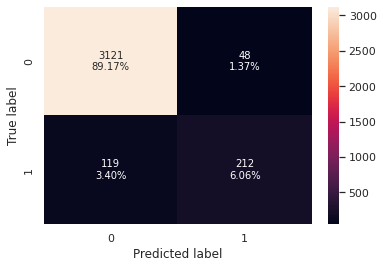

In [65]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, x_train, y_train)

**Checking scores of different classification metrics on Training data**

In [66]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(lg, x_train, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.952286,0.640483,0.815385,0.717428


Recall score on Training data is low

**Check model performance on Test dataset**

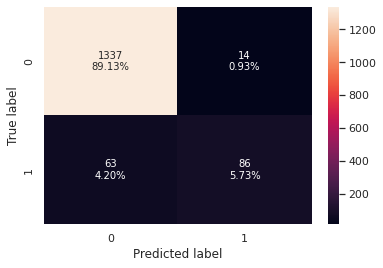

In [67]:
confusion_matrix_sklearn_with_threshold(lg, x_test, y_test)

**Checking scores of different classification metrics on Test data**

In [68]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(lg, x_test, y_test)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.948667,0.577181,0.86,0.690763


Recall score on Testing data is low as well, but closer to Training data.

**Model Improvement**

Let's build ROC/AUC on Training & Test data and see if we can improve the performance.

**ROC AUC on Training**

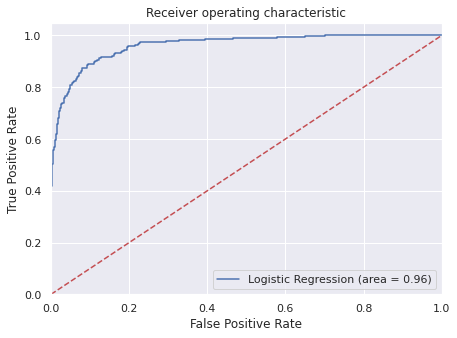

In [69]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**ROC AUC on test**

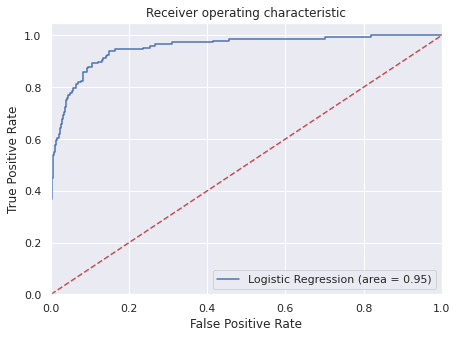

In [70]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Optimal threshold look like between 0.1 and 0.2 somewhere. Let's find using formula.

In [71]:
# Optimal threshold as per AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13377717743049805


Let's use this create confusion matrix and find scores,

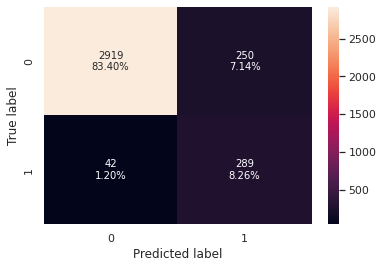

In [72]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_auc_roc
)

**Check scores on Training data**

In [73]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.916571,0.873112,0.536178,0.664368


**Check scores on Testing data**

In [74]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.91,0.832215,0.529915,0.64752


Recall has improved a lot. Precision and F1 both went down but as we care about recall for this dataset, it is ok. 

Let's build precision-recall curve to make precision score better and see if we can further improve recall score as well. 

**Precision - Recall Curve**

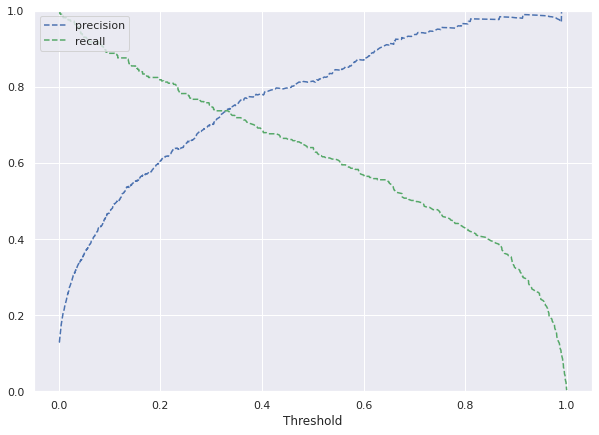

In [75]:
y_scores = lg.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Threshold where both precision and recall meets is somewhat around 0.35, let's set that.

In [76]:
# setting the threshold
optimal_threshold_curve = 0.35

**Creating confusion matrix on Training data**

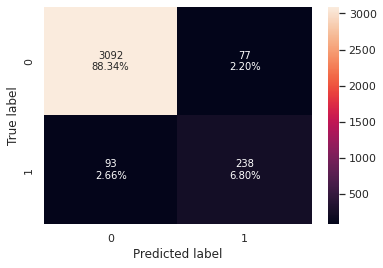

In [77]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_curve
)

**Check scores on Training data**

In [78]:

log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951429,0.719033,0.755556,0.736842


**Creating confusion matrix on Testing data**

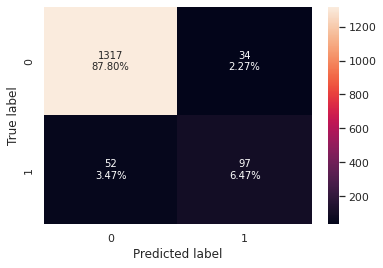

In [79]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)

**Check scores on Testing data**

In [80]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.942667,0.651007,0.740458,0.692857


Precision and F1 score both improved but recall reduced.

In [81]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.35 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.952286,0.916571,0.951429
Recall,0.640483,0.873112,0.719033
Precision,0.815385,0.536178,0.755556
F1,0.717428,0.664368,0.736842


In [82]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.13 Threshold",
    "Logistic Regression-0.35 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.13 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.948667,0.910000,0.942667
Recall,0.577181,0.832215,0.651007
Precision,0.860000,0.529915,0.740458
F1,0.690763,0.647520,0.692857


Recall was best at the threshold of 0.13. Precision and F1 were best at 0.35 threshold. 


**Summary of Observations From Logistics Modeling**

Logistics model was created using solver newton-cg .

Feature like Income, Education, Family and CCAvg have positive coefficients and Credit card, Security account, Online and Experience have negative coefficients. 

Initial modeling with default threshold of 0.5 gave the recall score of 0.57 which pretty low. 

Used ROC/AUC to find the optimum threshold of 0.13 to get the best recall score of 0.83. However, it decreased Precision and F1 score. 

Tried Precision-Recall curve to make Precision and F1 better and it got better but recall went down, which is our primary metric. 

We shold model at 0.13 threshold to get the best result for the objective of this project. 


# **7. Model building - Decision Tree**

I would like to build and evaluate Decision Tree 3 ways. One is default way (as-is without any pruning), second with pre-pruning and third with post-pruning (cost complexity pruning) and compare the performances of all at the end. 

Each way, below steps would be followed - 

1) create and fit the model with same class weights across all. 

2) check performance and recall score on training data

3) check performance and recall score on testing data

4) Visulize the tree - via plotting and printing text

5) Print and plot the importance features in tree building 

**Find the class weight**


In model, for hyperparameter class_weight, need to find the weightage, let me see the how the target data is divided in dataset. 

In [83]:
loan.Personal_Loan.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

Approximately, 90% have 0 and 10% have 1. Class weight in decision tree will be set based on this. 

**Create generic functions**

Create two functions that can be used across all the trees. One to calculate recall score and another create confusion matrix.

In [84]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [85]:
## Function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Default Tree (as-is without pruning)**

To create Decision Tree, I would like to use default 'gini' criteria to split and set random_state = 1

In [86]:
model = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.1, 1: 0.9}, random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

**Check model performance on Training dataset**

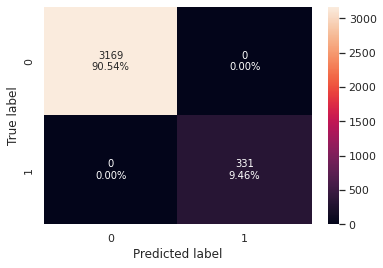

In [87]:
confusion_matrix_sklearn_with_threshold(model, x_train, y_train)

By looking at confusion matrix, recall score should be 1. Let's double check.

In [88]:
decision_tree_perf_train = get_recall_score(model, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


As expected it's 1. 

**Check model performance on Test dataset**

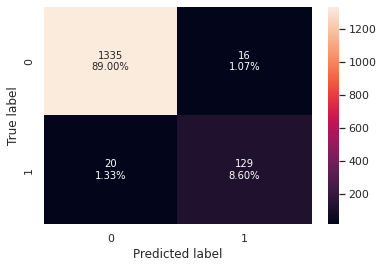

In [89]:
confusion_matrix_sklearn_with_threshold(model, x_test, y_test)

**Check recall score of Test dataset**

In [90]:
decision_tree_perf_test = get_recall_score(model, x_test, y_test)

print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8657718120805369


For test dataset, these much recall is not bad at all. Later will see how much can we make it better. 

**Visulize the Tree**

In [91]:
## creating a list of column names
feature_names = x_train.columns.to_list()

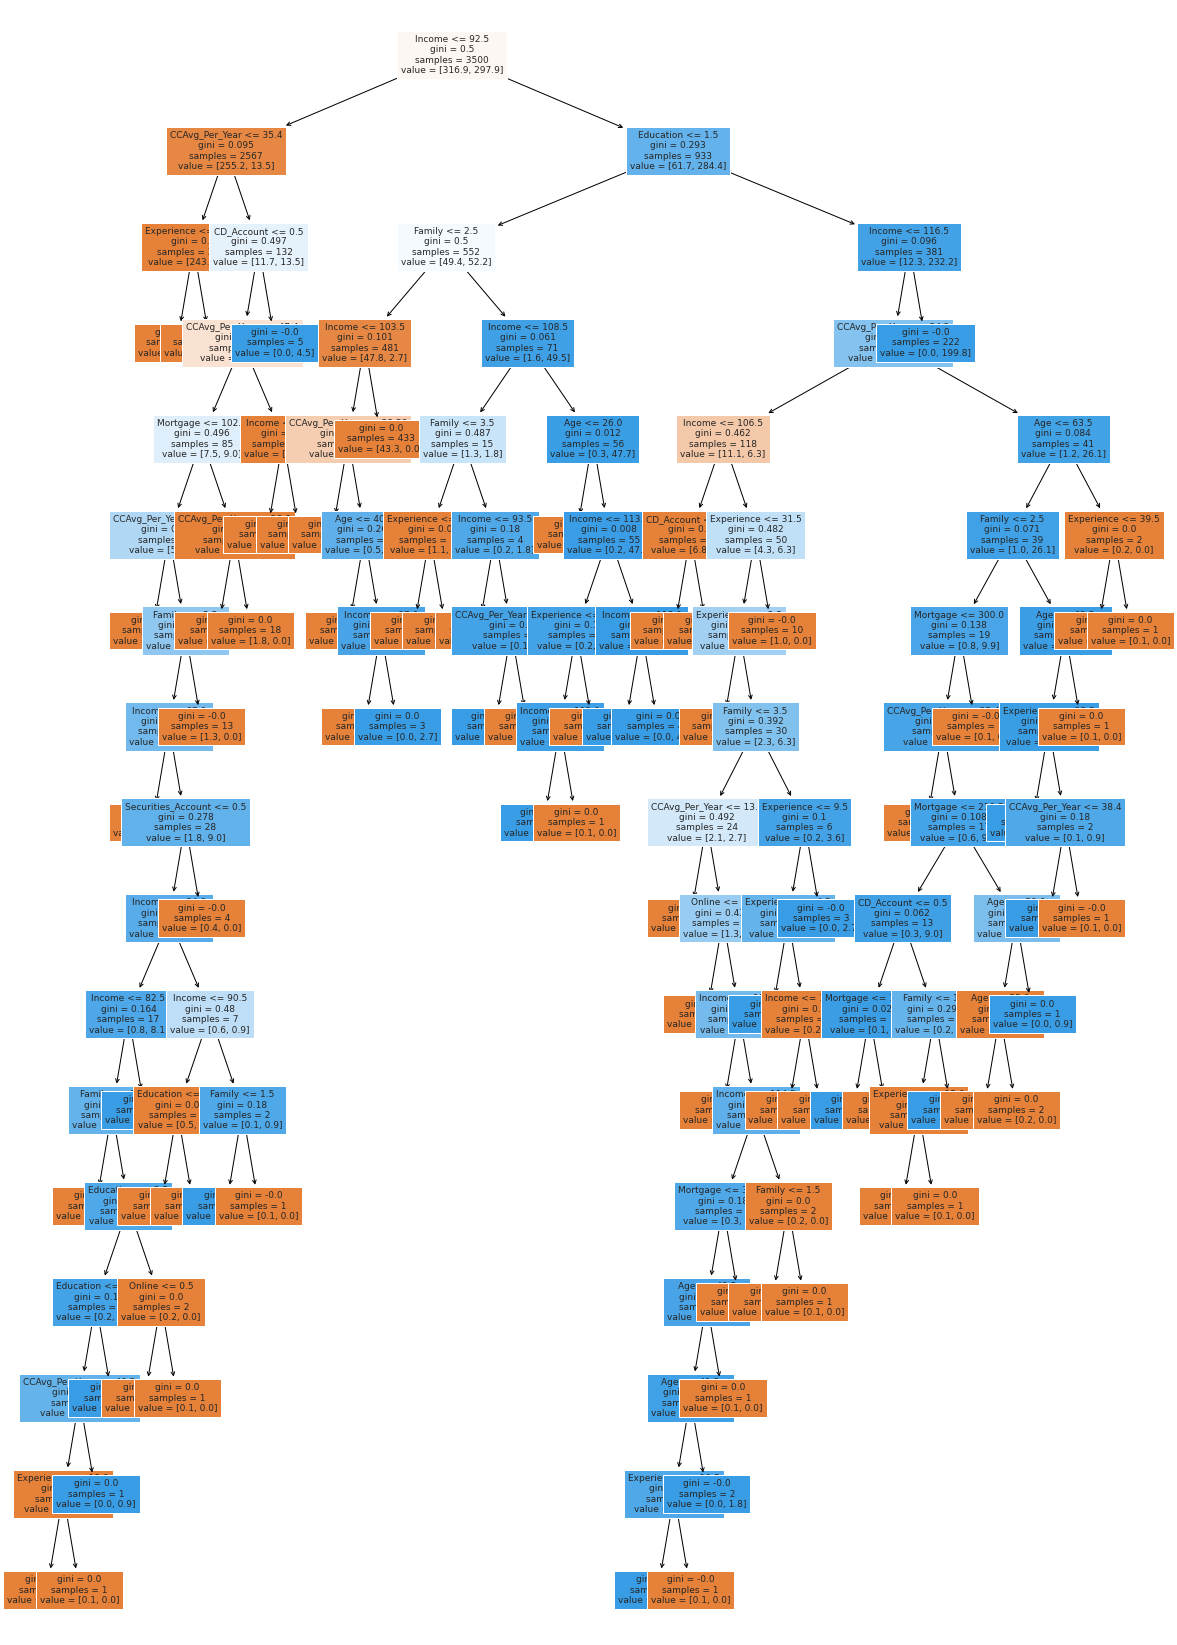

In [92]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [93]:
# Text report of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_Per_Year <= 35.40
|   |   |--- Experience <= 0.03
|   |   |   |--- weights: [4.90, 0.00] class: 0
|   |   |--- Experience >  0.03
|   |   |   |--- weights: [238.60, 0.00] class: 0
|   |--- CCAvg_Per_Year >  35.40
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_Per_Year <= 47.40
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg_Per_Year <= 36.60
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- CCAvg_Per_Year >  36.60
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |  

Above tree has many branches and very difficult to interpret.

**Find & Plot Important Features**

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the
print(pd.DataFrame(model.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.633884
Family              0.152660
CCAvg_Per_Year      0.090907
Education           0.090099
Experience          0.008152
CD_Account          0.007872
Mortgage            0.006742
Age                 0.006110
Securities_Account  0.001879
Online              0.001696
CreditCard          0.000000


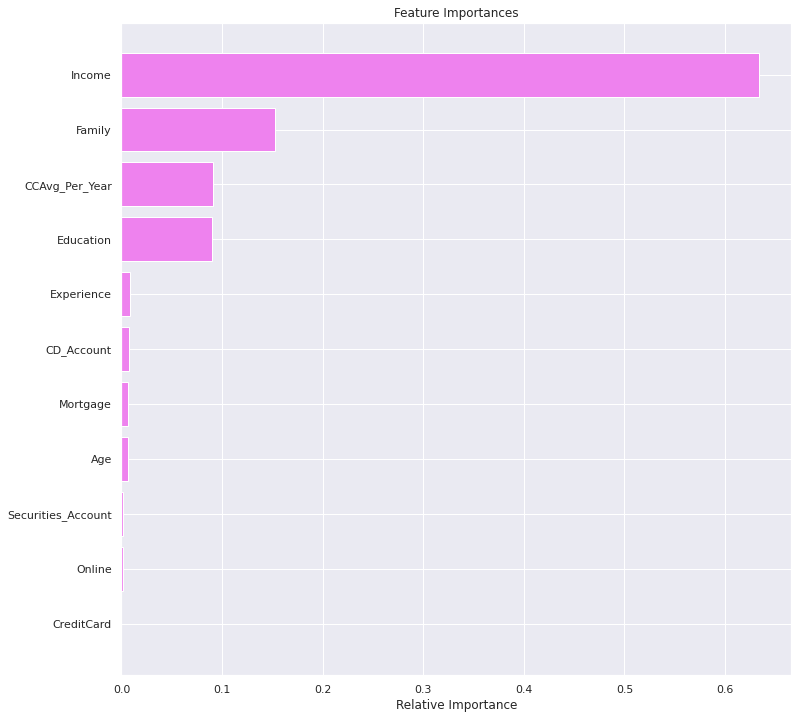

In [95]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income has the highest importance (~63%), followed by family which is ~15%. Huge gap between first 2 important features. Also, except credicard, all featueres have some importance. 

As we know the model is overfit. Let's try to reduce it by pre-prunning and post-prunning methods.

## **Pre Pruning**

For Pre-pruning, we will use different hyperparameters and do the gridsearch to find out the best combination. 

To find the best combinations, will try max_depth upto 10, will try gini and entropy as creterion, splitter as best and random and min_impurity_decrease at 0.00001, 0.0001, 0.01

In [96]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

In [97]:
# Print the best parameters Grid Search found 
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.01,
 'splitter': 'best'}

Above combination gets us the best recall score. Let's check performance now.

**Check model performance on Training dataset**

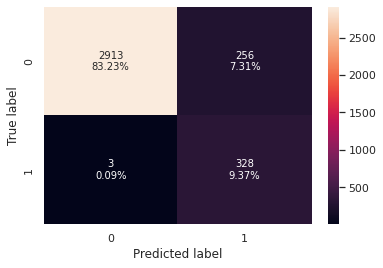

In [98]:
confusion_matrix_sklearn(estimator, x_train, y_train)

**Check recall score of Traning dataset**

In [99]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9909365558912386


Recall score of training set is 0.99, very close to the recall score of 1 of default tree 

**Check model performance on Test dataset**

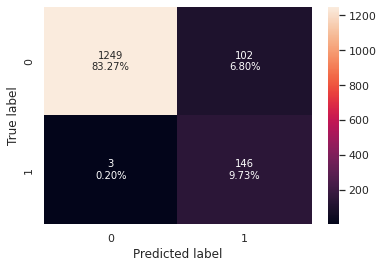

In [100]:
confusion_matrix_sklearn(estimator, x_test, y_test)

**Check recall score of Test dataset**

In [101]:
decision_tree_tune_perf_test = get_recall_score(estimator, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9798657718120806


Recall score of Test dataset improved a lot after pre-pruning. Also, it is closed to Training score.

**Visulize the Tree**

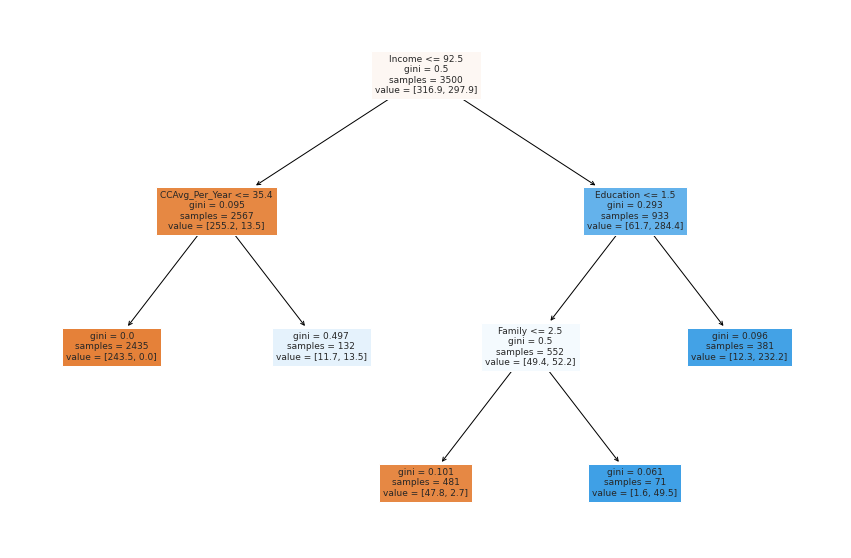

In [102]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [103]:
# Text report of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_Per_Year <= 35.40
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg_Per_Year >  35.40
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [12.30, 232.20] class: 1



Tree looks much better and easily readable. The depth is 3. 

Few observations - 

1) If customer's income is less than 92.5K per year and CC_Avg per year is more than 35.4K then customer tend to get Personal Loan. 

2) If customer's income more more than 92.5K and Education less than Graduate and family is more than 2 members then custoemr tend to get Personal Loan.

3) If customer's income more more than 92.5K and Education is Graduate or higher tend to take Personal Loan. 

**Find & Plot Important Features**

In [104]:
# importance of features in the tree building
print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.684653
Family              0.161790
Education           0.103717
CCAvg_Per_Year      0.049840
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


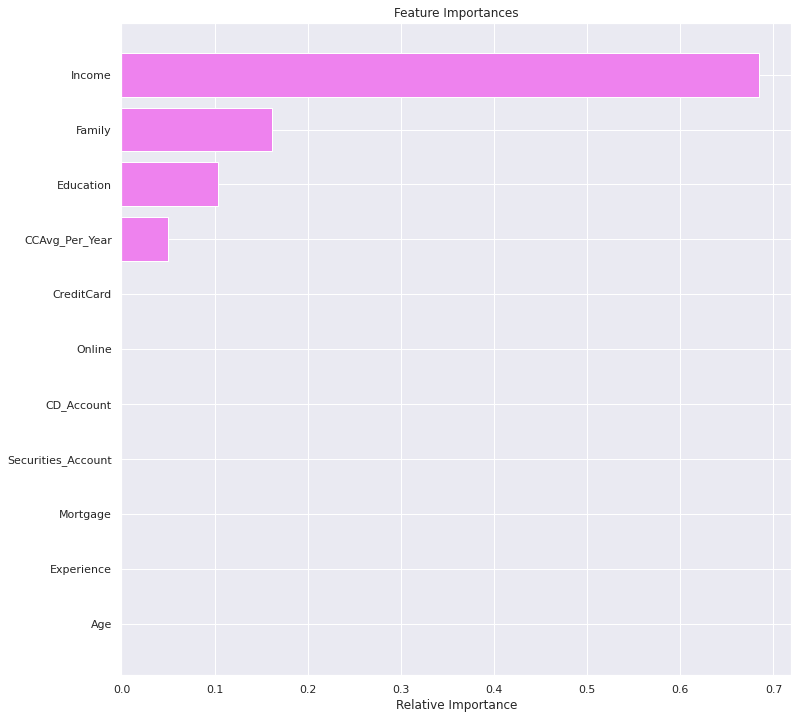

In [105]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Inportance of Income feature increased after pre-pruning and same for other top features as well. Except 4, rest all feature importance became 0.

## **Post Prunning**

Let's find the cost complexity parameter (ccp_alpha) by building DecisionTreeClassifier using the same class weights used earlier.

In [106]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.1, 1: 0.9})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [107]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.883009e-15
1,1.805828e-19,-1.882828e-15
2,1.805828e-19,-1.882648e-15
3,1.805828e-19,-1.882467e-15
4,3.792239e-19,-1.882088e-15
5,6.139815e-19,-1.881474e-15
6,7.223312e-19,-1.880752e-15
7,7.223312e-19,-1.880029e-15
8,3.575539e-18,-1.876454e-15
9,9.029140e-18,-1.867425e-15


First value of ccp_alpha is 0 and so the impurity. Greater the alpha, more braches are pruned from tree so as alpha increases, impurity also increases in the tree. 

In [108]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.1, 1: 0.9}
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2928785401980025


To train the tree with effective alphas, remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

In [109]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [110]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [111]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [112]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

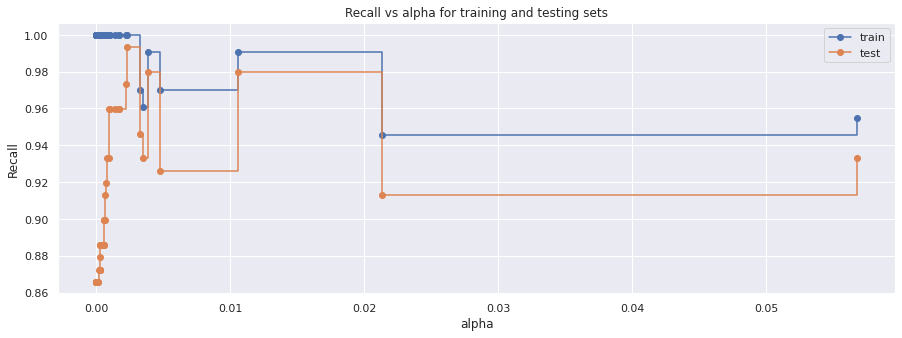

In [113]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Best recall value after overfitting is at around 0.011 ccp_alpha value

Creating model with 0.011 ccp_alpha

In [114]:
best_model = DecisionTreeClassifier(ccp_alpha=0.011, class_weight={0: 0.1, 1: 0.9}, random_state=1)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.011, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

**Check model performance on Training dataset**

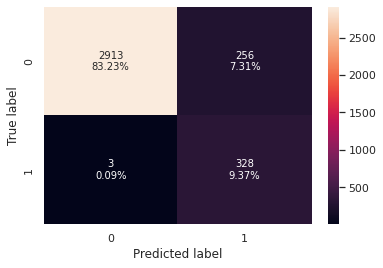

In [115]:
confusion_matrix_sklearn(best_model, x_train, y_train)

**Check recall score of Traning dataset**

In [116]:
decision_tree_postpruned_perf_train = get_recall_score(best_model, x_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9909365558912386


**Check model performance on Test dataset**

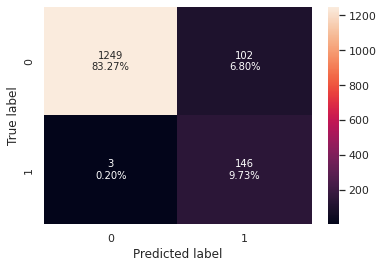

In [117]:
confusion_matrix_sklearn(best_model, x_test, y_test)

**Check recall score of Test dataset**

In [118]:
decision_tree_postpruned_perf_test = get_recall_score(best_model, x_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9798657718120806


Recall score on Test looks much higher compare to default tree.

**Visulize the tree**

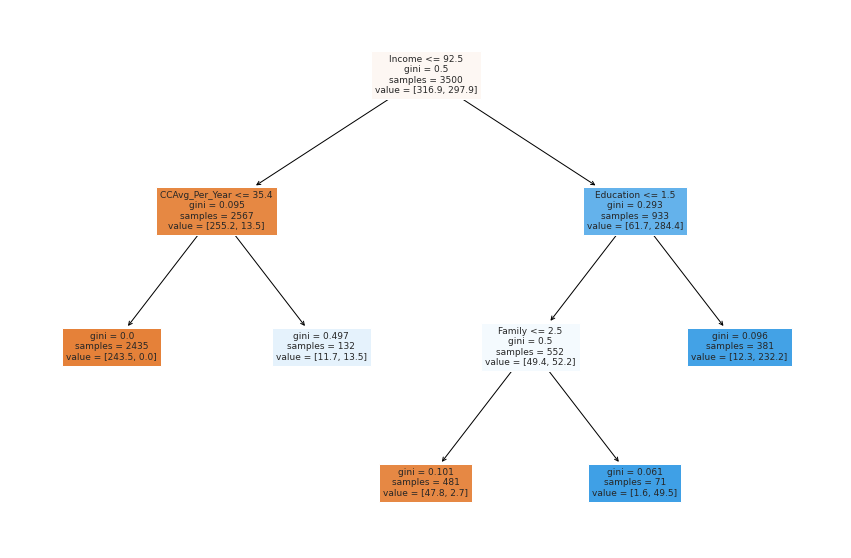

In [119]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_Per_Year <= 35.40
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg_Per_Year >  35.40
|   |   |--- weights: [11.70, 13.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [47.80, 2.70] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [12.30, 232.20] class: 1



The observations from above tree is much similar to pre-pruning. 

**Find & Plot Important Features**

In [121]:
# importance of features in the tree building 
print(pd.DataFrame(best_model.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by="Imp", ascending=False))

                         Imp
Income              0.684653
Family              0.161790
Education           0.103717
CCAvg_Per_Year      0.049840
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


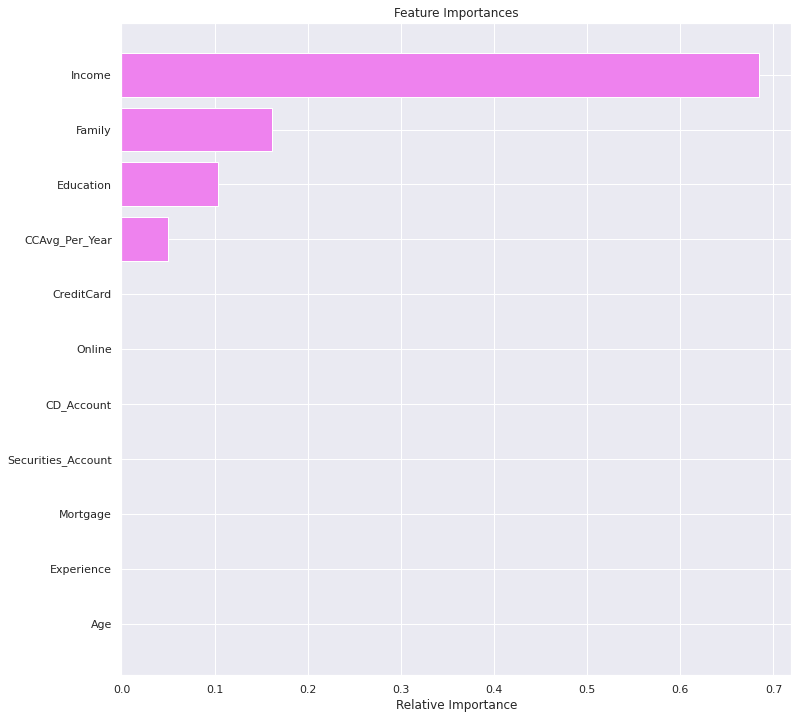

In [122]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

It is very similar to pre-puning. Importance of Income feature increased after post-pruning compare to default and same for other top features as well. Except 4, rest all feature importance became 0. 

## **Comparing all the decision tree models**

We have created 3 trees and got recall score of all of those. Let's put those together and compare. 

In [123]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.990937
2,0.990937


Recall on Pre-Puning and Post-Puning is same. 

In [124]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.865772
1,0.979866
2,0.979866


Recall on Pre-Puning and Post-Puning is same. 

**Summary of Observations From Decision Tree Modeling**

We analyzed the Training and Test data of loan dataset using 3 different techniques (default, pre-pruning and post-pruning) by using Decision Tree Classifier and built predictive model.

Determined the class-weight because data of Personal Loan was divided almost at 90-10. So one class would become more dominant if class weight is not used as parameter. 

Pre and Post pruning reduced the overfitting. 

The initial recall score was 0.86. Pre-punning improved the recall to 0.97. 

Using GridSearchCV, found the best criterion was gini with max depth of 5 and minimum impurity decrease at 0.01. 

Found the most recall value at 0.011 alpha and that gave the best reclass at 0.97. 

The most important feature is Income, followed by family and then education. 

Features like Credit Card, Online, Security Account etc. almost do not contribute to personal taking loan. 


# **8. Summary of Insights & Recommendations**

As part of this project, we have analyzed the data of Personal Loan Campaign dataset to find AllLife bank customers that can take Personal Loan from the bank. 

Based on the nature of the objective and the data provided, recall metrics was the best to measure for both the kind of modeling. 

To achieve the goal, we started with Logistic Regression Modeling. First tried with default threshold (0.5) and found the recall score was low. Used ROC/AUC to find the optimum threshold of 0.13 to get the best recall score of 0.87. 

Logistic Regression got better score on Precision and F1 on the threshold of 0.35. However the goal was to get the best recall score, I would not recommend to use that and stick to 0.13. 

Found positive coefficients on features like Income, Education, Family and CCAvg, marketing team should focus on customers with higher in such features, they are more likely to accept the Personal Loan when offered. 

Features like Credit card, Security account and Online got negative coefficients, so focus should be not to target customers having positive or higher values in these features. 

Next we built the Decision Tree on the same data. The default initial (as-is) tree gave the recall of 0.86 which was pretty high, bit higher than the best we got from Logistics.  

Built the Decision Tree with Pre-Pruning and Post-Pruning and found the recall score around 0.96 in both the cases, which is really high. 

In all the 3 ways, most important feature found was Income and that followed by Family, Education and CCAvg. Rest of the features didn't add values. Marketing team should target customers with higher income, more family members and higher education to increase the chance of liability customers becoming Personal Loan customers. 

After analyzing the results from Logistics Regression and Decision Tree, I would recommend to use Decision Tree modeling for this campaign. The reason being, first it gives better recall score compare to Logistics and second, the dataset has lot of outliers in the features like Income, Mortgave, CCAvg and Decision Tree works better when there are valid outliers in the dataset. 

In the begining section of this notebook, 3 objectives were defined. We were able to answer all of those - 

**Predict whether a liability customer will buy a personal loan or not** Done using 2 different modeling methods. 

**Find most significant variables.** top 3 are - Income, Family size & Education.

**Find segments of customers should be targeted more** customers with higher income(more than 90K), family members of 3 or more and education of graduate or higher.

I would also like to recommend/advise bank to add other features in dataset like customer's credit history, other expenses, liabilities (like other loans from different banks) etc. as those could make significant contributions as well.


